In [11]:
from PIL import Image
from bird_utils.datasets import get_basic_transform, get_datasets
from bird_utils.models import get_vgg_19, get_vgg_16, get_vgg_13, get_vgg_11, get_frozen_model
from bird_utils.test import get_predictions, predictions_to_csv
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD
from torchvision.transforms import transforms

import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets

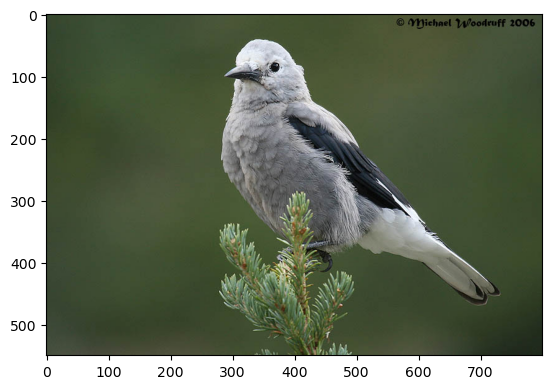

In [12]:
TEST_ROOT_DIR = "/home/dubcar/bird_classifier/birds23sp/birds/test"

"/home/dubcar/bird_classifier/birds23sp/birds/test/0/0a1b3b87fc8d46ee8499a5af50471683.jpg"

img = Image.open("/home/dubcar/bird_classifier/birds23sp/birds/test/0/0a1b3b87fc8d46ee8499a5af50471683.jpg")
plt.imshow(img)

In [13]:
test_transform = transforms.Compose([
    # Data augmentation
    transforms.Resize(size = 224),
    transforms.CenterCrop(size = 224),
    transforms.ToTensor(),

    # data-standardization for imgnet dataset
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),
])

In [14]:
TRAIN_ROOT_DIR = "/home/dubcar/bird_classifier/birds23sp/birds/train"

train_set, val_set, num_classes = get_datasets(
    TRAIN_ROOT_DIR,
    test_transform
)

In [15]:
test_set = datasets.ImageFolder(
    root = TEST_ROOT_DIR,
    transform = test_transform
)

test_loader = DataLoader(test_set, batch_size = 64, shuffle = False)

In [25]:
test_names = ["test/" + sample[0].split("/")[-1] for sample in test_set.samples]

In [17]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)  # this should print out CUDA

cuda


In [18]:
VGG_19_PATH = "/home/dubcar/bird_classifier/model_parameters/vgg19_best.pth"

vgg19 = get_vgg_19(num_classes = num_classes)
vgg19.load_state_dict(torch.load(VGG_19_PATH))
vgg19.to(DEVICE)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [19]:
vgg19_predictions = get_predictions(
    vgg19,
    test_loader,
    test_names
)

  getting predictions...


100%|██████████| 157/157 [02:28<00:00,  1.06it/s]


In [29]:
predictions_to_csv(
    vgg19_predictions,
    "/home/dubcar/bird_classifier/predictions/vgg19.csv",
)

In [ ]:
VGG_11_PATH = "/home/dubcar/bird_classifier/model_parameters/vgg11_best.pth"

vgg11 = get_vgg_11(num_classes = num_classes)
vgg11.load_state_dict(torch.load(VGG_11_PATH))
vgg11.to(DEVICE)

In [ ]:
vgg11_predictions = get_predictions(
    vgg11,
    test_loader,
    test_names
)

In [ ]:
predictions_to_csv(
    vgg11_predictions,
    "/home/dubcar/bird_classifier/predictions/vgg11.csv",
)